In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [4]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fcd05be0edd6fd91056ed9f140fddd5a


In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------


In [6]:
#for i, item in enumerate(list):

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | punta arenas
Processing Record 2 of Set 13 | torbay
Processing Record 3 of Set 13 | bredasdorp
Processing Record 4 of Set 13 | qaanaaq
Processing Record 5 of Set 13 | daxian
City not found. Skipping...
Processing Record 6 of Set 13 | cabo san lucas
Processing Record 7 of Set 13 | cape town
Processing Record 8 of Set 13 | pirgos
Processing Record 9 of Set 13 | cayenne
Processing Record 10 of Set 13 | hilo
Processing Record 11 of Set 13 | gibraltar
Processing Record 12 of Set 13 | khatanga
Processing Record 13 of Set 13 | alekseyevsk
Processing Record 14 of Set 13 | namatanai
Processing Record 15 of Set 13 | lavrentiya
Processing Record 16 of Set 13 | ganganagar
Processing Record 17 of Set 13 | sembe
Processing Record 18 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 13 | beira
Processing Record 20 of Set 13 | college
Processing Record 21 of Set 13 | grindavik
Processing Record 22 of Set 13 | jamestown
Processing Record 2

Processing Record 36 of Set 16 | cap malheureux
Processing Record 37 of Set 16 | onokhoy
Processing Record 38 of Set 16 | lodingen
Processing Record 39 of Set 16 | hamina
Processing Record 40 of Set 16 | paray-le-monial
Processing Record 41 of Set 16 | meadow lake
Processing Record 42 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 16 | airai
Processing Record 44 of Set 16 | beringovskiy
Processing Record 45 of Set 16 | mnogovershinnyy
Processing Record 46 of Set 16 | cantilan
Processing Record 47 of Set 16 | crab hill
City not found. Skipping...
Processing Record 48 of Set 16 | haines junction
Processing Record 49 of Set 16 | palmer
Processing Record 50 of Set 16 | palembang
Processing Record 1 of Set 17 | nishihara
Processing Record 2 of Set 17 | yar-sale
Processing Record 3 of Set 17 | port lincoln
Processing Record 4 of Set 17 | autazes
Processing Record 5 of Set 17 | diffa
Processing Record 6 of Set 17 | fortuna
Processing Record 7 of Set 17 | talcahua

City not found. Skipping...
Processing Record 23 of Set 20 | guerrero negro
Processing Record 24 of Set 20 | najran
Processing Record 25 of Set 20 | rosetta
Processing Record 26 of Set 20 | todos santos
Processing Record 27 of Set 20 | cartagena
Processing Record 28 of Set 20 | austin
Processing Record 29 of Set 20 | lahaina
Processing Record 30 of Set 20 | kadykchan
City not found. Skipping...
Processing Record 31 of Set 20 | pierre
Processing Record 32 of Set 20 | bilibino
Processing Record 33 of Set 20 | awbari
Processing Record 34 of Set 20 | teluk nibung
Processing Record 35 of Set 20 | kavaratti
Processing Record 36 of Set 20 | chara
Processing Record 37 of Set 20 | contai
Processing Record 38 of Set 20 | chiredzi
Processing Record 39 of Set 20 | mokhsogollokh
Processing Record 40 of Set 20 | san cristobal
Processing Record 41 of Set 20 | ponta do sol
Processing Record 42 of Set 20 | kadarkut
Processing Record 43 of Set 20 | bogotol
Processing Record 44 of Set 20 | devonport
Proc

Processing Record 9 of Set 24 | iraray
Processing Record 10 of Set 24 | pathein
Processing Record 11 of Set 24 | dhanera
Processing Record 12 of Set 24 | zhaotong
Processing Record 13 of Set 24 | luba
Processing Record 14 of Set 24 | deniliquin
Processing Record 15 of Set 24 | erenhot
Processing Record 16 of Set 24 | bilma
Processing Record 17 of Set 24 | zapolyarnyy
Processing Record 18 of Set 24 | pasvalys
Processing Record 19 of Set 24 | dharchula
Processing Record 20 of Set 24 | saint-michel-des-saints
Processing Record 21 of Set 24 | nguiu
City not found. Skipping...
Processing Record 22 of Set 24 | chapais
Processing Record 23 of Set 24 | kaveripattinam
Processing Record 24 of Set 24 | male
Processing Record 25 of Set 24 | srednekolymsk
Processing Record 26 of Set 24 | kipini
Processing Record 27 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 24 | enid
Processing Record 29 of Set 24 | adrar
Processing Record 30 of Set 24 | lubao
Processing Record 31 of Set 24 |

In [8]:
len(city_data)

576

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,32.00,89,75,11.41,CL,2020-07-10 21:43:11
1,Torbay,47.67,-52.73,57.99,76,90,5.82,CA,2020-07-10 21:46:28
2,Bredasdorp,-34.53,20.04,50.00,81,42,10.29,ZA,2020-07-10 21:44:34
3,Qaanaaq,77.48,-69.36,45.18,59,59,2.64,GL,2020-07-10 21:44:15
4,Cabo San Lucas,22.89,-109.91,89.60,66,20,11.41,MX,2020-07-10 21:46:26
5,Cape Town,-33.93,18.42,53.01,81,75,18.34,ZA,2020-07-10 21:41:45
6,Pirgos,35.12,25.72,77.00,57,7,15.01,GR,2020-07-10 21:46:29
7,Cayenne,4.93,-52.33,84.20,70,100,4.70,GF,2020-07-10 21:44:46
8,Hilo,19.73,-155.09,82.40,61,90,6.93,US,2020-07-10 21:42:27
9,Gibraltar,36.14,-5.35,71.60,83,0,6.93,GI,2020-07-10 21:46:29


In [10]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-07-10 21:43:11,-53.15,-70.92,32.00,89,75,11.41
1,Torbay,CA,2020-07-10 21:46:28,47.67,-52.73,57.99,76,90,5.82
2,Bredasdorp,ZA,2020-07-10 21:44:34,-34.53,20.04,50.00,81,42,10.29
3,Qaanaaq,GL,2020-07-10 21:44:15,77.48,-69.36,45.18,59,59,2.64
4,Cabo San Lucas,MX,2020-07-10 21:46:26,22.89,-109.91,89.60,66,20,11.41
5,Cape Town,ZA,2020-07-10 21:41:45,-33.93,18.42,53.01,81,75,18.34
6,Pirgos,GR,2020-07-10 21:46:29,35.12,25.72,77.00,57,7,15.01
7,Cayenne,GF,2020-07-10 21:44:46,4.93,-52.33,84.20,70,100,4.70
8,Hilo,US,2020-07-10 21:42:27,19.73,-155.09,82.40,61,90,6.93
9,Gibraltar,GI,2020-07-10 21:46:29,36.14,-5.35,71.60,83,0,6.93


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594417718.0063484

In [15]:
today = time.strftime("%x")
today

'07/10/20'

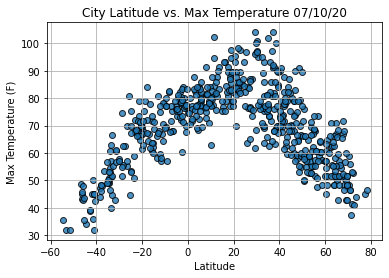

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

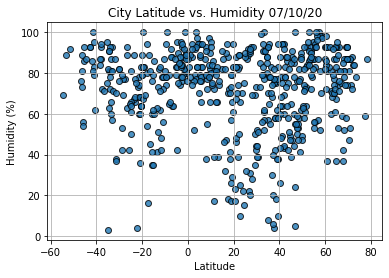

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

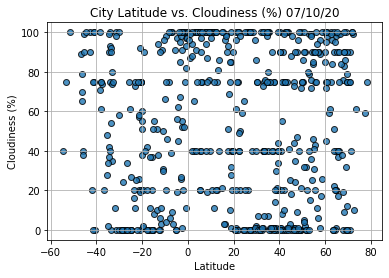

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

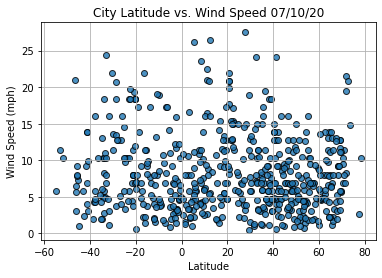

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                   Lavrentiya
Country                        RU
Date          2020-07-10 21:46:30
Lat                         65.58
Lng                          -171
Max Temp                    51.33
Humidity                       74
Cloudiness                     99
Wind Speed                   1.12
Name: 13, dtype: object

In [37]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
571     True
572     True
573    False
574    False
575     True
Name: Lat, Length: 576, dtype: bool

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Torbay,CA,2020-07-10 21:46:28,47.67,-52.73,57.99,76,90,5.82
3,Qaanaaq,GL,2020-07-10 21:44:15,77.48,-69.36,45.18,59,59,2.64
4,Cabo San Lucas,MX,2020-07-10 21:46:26,22.89,-109.91,89.60,66,20,11.41
6,Pirgos,GR,2020-07-10 21:46:29,35.12,25.72,77.00,57,7,15.01
7,Cayenne,GF,2020-07-10 21:44:46,4.93,-52.33,84.20,70,100,4.70


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

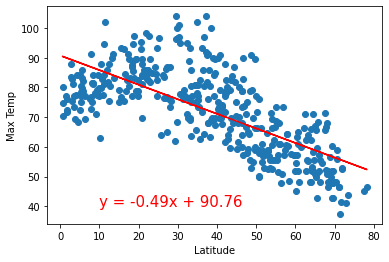

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

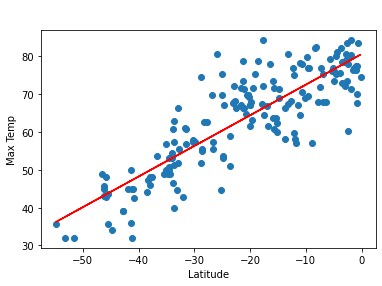

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

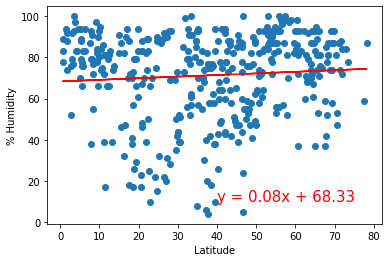

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

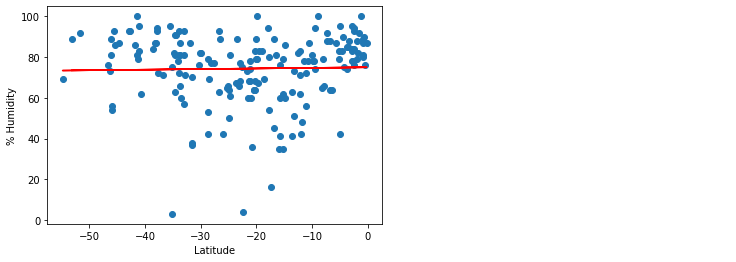

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(40,10))

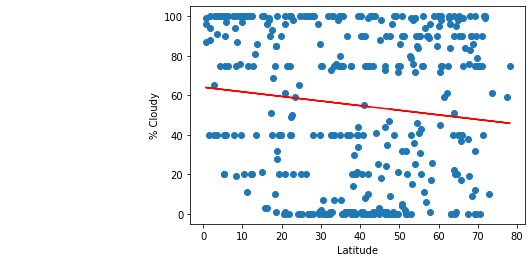

In [46]:
# Linear regression on Cloudines in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudy',(-50,15))

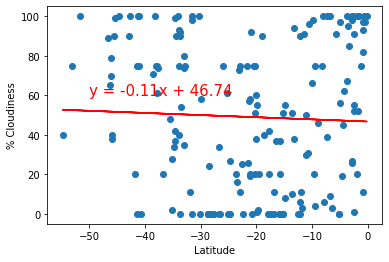

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

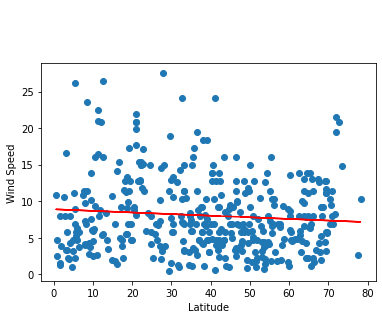

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

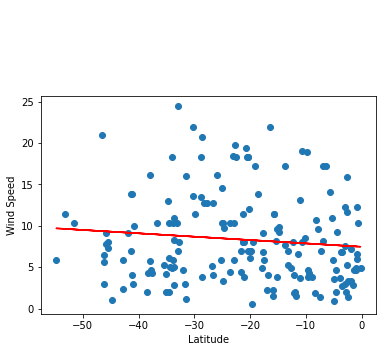

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))